In [1]:
# Testing Julia code for computing transit light curves

include("phot.jl")
using PyPlot

In [2]:
function compute_theta(bp, bpm, bm)   
  a = bp; b = bpm; c = bm
  if a > b
    tmp = b
    b = a
    a = tmp
  end
  if b > c
    mu = c - (a - b)
  else
    mu = b - (a - c)
  end
  theta = 2 * atan(sqrt(((a - b) + c) * mu / ((a + (b + c)) * ((a - c) + b))))
  return theta
end    

compute_theta (generic function with 1 method)

In [3]:
c1 = 0.3; c2 = 0.3; rp = 0.2; rm = 0.05

# We'll assume straight-lined paths with minimum
# impact parameters of:
byp = 0.5; bym = 0.6
# And constant velocities for the planet and moon:
vp = 0.1; vm = 0.2
# Time array:
t = collect(-20.0:0.0001:20.0)
t0p = 0.0; t0m = 0.0
# Compute the impact parameters:
b(b0,v,t0,t) = sqrt(b0^2+(v*(t-t0))^2)
# Next, compute impact parameter between planet and moon:
bdiff(byp,bym,vp,vm,t0p,t0m,t) = sqrt((byp-bym)^2+(vp*(t-t0p)-vm*(t-t0m))^2)
bp = b.(byp,vp,t0p,t)
bm = b.(bym,vm,t0m,t)
nt = length(t)
lc = zeros(8,nt)
bpm = bdiff.(byp,bym,vp,vm,t0p,t0m,t)
theta = compute_theta.(bp,bpm,bm)
cth = cos.(theta)
sth = sin.(theta)
flux!(c1, c2, rp, rm, bp, bpm, cth, sth, lc, nt)
# Right now this is not working for the linear limb-darkening
# case - probably a problem with the elliptic integrals.

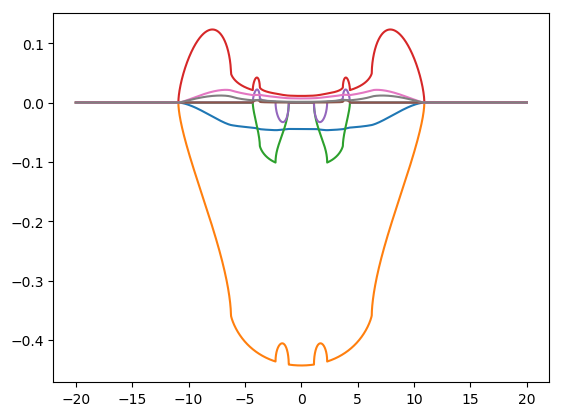

In [5]:
pygui(false)
clf()
for j=1:8
  plot(t,lc[j,:])
end